In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager as fm
font_path = 'C:\\Windows\\Fonts\\gulim.ttc'
font = fm.FontProperties(fname=font_path).get_name()
mpl.rc('font', family=font)

강서_대여소_ID = pd.read_csv('../../Data/따릉이/강서_따릉이_대여소_ID.csv',encoding='utf-8')

강서_따릉이_데이터 = pd.read_csv('../../Data/따릉이/강서_따릉이_데이터_01.csv',encoding='utf-8')

출퇴근_이용량_통합 = pd.read_csv('./결과물/출퇴근_이용량_통합.csv',encoding='utf-8')

In [10]:
강서_대여소_ID[:5]

,대여소_ID
0,ST-975
1,ST-837
2,ST-836
3,ST-835
4,ST-834


In [11]:
강서_따릉이_데이터[:5]

,기준_날짜,기준_시간대,시작_대여소_ID,종료_대여소_ID,전체_건수,전체_이용_분,전체_이용_거리,요일,주말,휴일
0,2023-05-08,200,ST-2037,ST-2037,1,1,30,0,0,0
1,2023-05-08,1155,ST-824,ST-824,1,1,80,0,0,0
2,2023-05-08,1230,ST-829,ST-829,1,1,111,0,0,0
3,2023-05-08,1340,ST-2611,ST-2611,1,1,10,0,0,0
4,2023-05-08,1635,ST-2031,ST-2031,1,1,170,0,0,0


In [6]:
출퇴근_이용량_통합[:5]

,Unnamed: 0,대여소_ID,출근대여량,출근반납량,대여-반납량_출근,차이절대값_출근,총이용량_출근,퇴근대여량,퇴근반납량,대여-반납량_퇴근,차이절대값_퇴근,총이용량_퇴근,출퇴근_총이용량,최종용도
0,0,ST-1062,3743,2281,1462,1462,6024,3947,5456,-1509,1509,9403,15427,주거
1,1,ST-1063,5029,8839,-3810,3810,13868,5795,3170,2625,2625,8965,22833,상업
2,2,ST-1064,3764,8489,-4725,4725,12253,9005,5562,3443,3443,14567,26820,상업
3,3,ST-1065,5860,5507,353,353,11367,14431,16569,-2138,2138,31000,42367,주거
4,4,ST-1067,3394,2906,488,488,6300,2666,3654,-988,988,6320,12620,주거


In [12]:
출퇴근_이용량_통합.drop('Unnamed: 0', axis=1, inplace=True)

In [14]:
출퇴근_이용량_통합[:5]

,대여소_ID,출근대여량,출근반납량,대여-반납량_출근,차이절대값_출근,총이용량_출근,퇴근대여량,퇴근반납량,대여-반납량_퇴근,차이절대값_퇴근,총이용량_퇴근,출퇴근_총이용량,최종용도
0,ST-1062,3743,2281,1462,1462,6024,3947,5456,-1509,1509,9403,15427,주거
1,ST-1063,5029,8839,-3810,3810,13868,5795,3170,2625,2625,8965,22833,상업
2,ST-1064,3764,8489,-4725,4725,12253,9005,5562,3443,3443,14567,26820,상업
3,ST-1065,5860,5507,353,353,11367,14431,16569,-2138,2138,31000,42367,주거
4,ST-1067,3394,2906,488,488,6300,2666,3654,-988,988,6320,12620,주거


In [15]:
출근 = 강서_따릉이_데이터[(강서_따릉이_데이터['기준_시간대'] >= 600) & (강서_따릉이_데이터['기준_시간대'] <= 1000)]
퇴근 = 강서_따릉이_데이터[(강서_따릉이_데이터['기준_시간대'] >= 1700) & (강서_따릉이_데이터['기준_시간대'] <= 2100)]

In [16]:
출근

,기준_날짜,기준_시간대,시작_대여소_ID,종료_대여소_ID,전체_건수,전체_이용_분,전체_이용_거리,요일,주말,휴일
609,2023-05-08,600,ST-1253,ST-1676,1,10,1248,0,0,0
610,2023-05-08,600,ST-1253,ST-1718,1,3,762,0,0,0
611,2023-05-08,600,ST-1253,ST-2031,1,3,830,0,0,0
612,2023-05-08,600,ST-1254,ST-2858,1,4,1104,0,0,0
613,2023-05-08,600,ST-1351,ST-2550,1,8,2010,0,0,0
...,...,...,...,...,...,...,...,...,...,...
1733236,2023-12-06,1000,ST-2557,ST-1249,1,5,870,2,0,0
1733237,2023-12-06,1000,ST-2056,ST-2049,1,1,270,2,0,0
1733238,2023-12-06,1000,ST-2045,ST-2042,1,4,746,2,0,0
1733239,2023-12-06,1000,ST-1251,ST-2044,1,8,1118,2,0,0


In [17]:
퇴근

,기준_날짜,기준_시간대,시작_대여소_ID,종료_대여소_ID,전체_건수,전체_이용_분,전체_이용_거리,요일,주말,휴일
8,2023-05-08,1735,ST-834,ST-834,1,1,20,0,0,0
9,2023-05-08,1745,ST-1509,ST-1509,2,1,30,0,0,0
10,2023-05-08,1800,ST-2045,ST-2045,1,1,20,0,0,0
11,2023-05-08,1815,ST-533,ST-533,1,1,70,0,0,0
9021,2023-05-08,1700,ST-1062,ST-2486,1,2,250,0,0,0
...,...,...,...,...,...,...,...,...,...,...
1738160,2023-12-06,2100,ST-3084,ST-1067,1,6,968,2,0,0
1738161,2023-12-06,2100,ST-511,ST-1645,1,7,1130,2,0,0
1738162,2023-12-06,2100,ST-2486,ST-2034,1,16,2492,2,0,0
1738163,2023-12-06,2100,ST-2045,ST-2037,1,7,1035,2,0,0


In [20]:
temp_df = 출근.groupby(['기준_날짜','시작_대여소_ID'])['전체_건수'].sum()

In [22]:
temp_df = pd.DataFrame(temp_df)

In [24]:
temp_df = temp_df.reset_index()

In [25]:
temp_df

,기준_날짜,시작_대여소_ID,전체_건수
0,2023-04-03,ST-1062,32
1,2023-04-03,ST-1063,61
2,2023-04-03,ST-1064,34
3,2023-04-03,ST-1065,57
4,2023-04-03,ST-1067,32
...,...,...,...
21485,2024-03-27,ST-829,10
21486,2024-03-27,ST-831,18
21487,2024-03-27,ST-834,22
21488,2024-03-27,ST-835,30


In [27]:
temp_df['기준_날짜'] = pd.to_datetime(temp_df['기준_날짜'])

In [28]:
temp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21490 entries, 0 to 21489
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   기준_날짜      21490 non-null  datetime64[ns]
 1   시작_대여소_ID  21490 non-null  object        
 2   전체_건수      21490 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 503.8+ KB


In [30]:
temp_df['month'] = temp_df['기준_날짜'].dt.month

In [31]:
temp_df

,기준_날짜,시작_대여소_ID,전체_건수,month
0,2023-04-03,ST-1062,32,4
1,2023-04-03,ST-1063,61,4
2,2023-04-03,ST-1064,34,4
3,2023-04-03,ST-1065,57,4
4,2023-04-03,ST-1067,32,4
...,...,...,...,...
21485,2024-03-27,ST-829,10,3
21486,2024-03-27,ST-831,18,3
21487,2024-03-27,ST-834,22,3
21488,2024-03-27,ST-835,30,3


In [33]:
temp_df[temp_df['month'].isin([6,7,8])]

,기준_날짜,시작_대여소_ID,전체_건수,month
3719,2023-06-01,ST-1062,54,6
3720,2023-06-01,ST-1063,45,6
3721,2023-06-01,ST-1064,50,6
3722,2023-06-01,ST-1065,66,6
3723,2023-06-01,ST-1067,30,6
...,...,...,...,...
9210,2023-08-31,ST-829,22,8
9211,2023-08-31,ST-831,29,8
9212,2023-08-31,ST-834,31,8
9213,2023-08-31,ST-835,42,8


In [34]:
temp_df_summer = temp_df[temp_df['month'].isin([6,7,8])]

In [35]:
temp_df_summer

,기준_날짜,시작_대여소_ID,전체_건수,month
3719,2023-06-01,ST-1062,54,6
3720,2023-06-01,ST-1063,45,6
3721,2023-06-01,ST-1064,50,6
3722,2023-06-01,ST-1065,66,6
3723,2023-06-01,ST-1067,30,6
...,...,...,...,...
9210,2023-08-31,ST-829,22,8
9211,2023-08-31,ST-831,29,8
9212,2023-08-31,ST-834,31,8
9213,2023-08-31,ST-835,42,8


In [37]:
import plotly.express as px

fig = px.scatter(x = temp_df_summer['기준_날짜'], y = temp_df_summer['전체_건수'])

fig.show()

c:\ProgramData\anaconda3\Lib\site-packages\_plotly_utils\basevalidators.py:106: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  v = v.dt.to_pydatetime()


In [39]:
temp_df_summer

,기준_날짜,시작_대여소_ID,전체_건수,month
3719,2023-06-01,ST-1062,54,6
3720,2023-06-01,ST-1063,45,6
3721,2023-06-01,ST-1064,50,6
3722,2023-06-01,ST-1065,66,6
3723,2023-06-01,ST-1067,30,6
...,...,...,...,...
9210,2023-08-31,ST-829,22,8
9211,2023-08-31,ST-831,29,8
9212,2023-08-31,ST-834,31,8
9213,2023-08-31,ST-835,42,8


In [40]:
상업대여소 = 출퇴근_이용량_통합[출퇴근_이용량_통합['최종용도'] == '상업']

In [41]:
temp_df_summer_work = temp_df_summer[temp_df_summer['시작_대여소_ID'].isin(상업대여소['대여소_ID'])]

In [42]:
temp_df_summer_work

,기준_날짜,시작_대여소_ID,전체_건수,month
3720,2023-06-01,ST-1063,45,6
3721,2023-06-01,ST-1064,50,6
3725,2023-06-01,ST-1249,59,6
3726,2023-06-01,ST-1250,6,6
3728,2023-06-01,ST-1252,1,6
...,...,...,...,...
9178,2023-08-31,ST-3137,4,8
9179,2023-08-31,ST-3145,4,8
9181,2023-08-31,ST-3251,12,8
9190,2023-08-31,ST-516,36,8


In [43]:
import plotly.express as px

fig = px.scatter(x = temp_df_summer_work['기준_날짜'], y = temp_df_summer_work['전체_건수'])

fig.show()

c:\ProgramData\anaconda3\Lib\site-packages\_plotly_utils\basevalidators.py:106: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



▲ 계절별로 나누어 시도(여름으로 시도)했으나 실패 ▲
 산점도를 그려보았을때 의미있는 결과 추론하기 어렵다고 판단

▼ 총 사용량 상위 10개소 추출하여 시도 ▼

In [44]:
강서_대여소_ID = pd.read_csv('../../Data/따릉이/강서_따릉이_대여소_ID.csv',encoding='utf-8')

강서_따릉이_데이터 = pd.read_csv('../../Data/따릉이/강서_따릉이_데이터_01.csv',encoding='utf-8')

출퇴근_이용량_통합 = pd.read_csv('./결과물/출퇴근_이용량_통합.csv',encoding='utf-8')

In [45]:
강서_대여소_ID[:5]

,대여소_ID
0,ST-975
1,ST-837
2,ST-836
3,ST-835
4,ST-834


In [46]:
강서_따릉이_데이터[:5]

,기준_날짜,기준_시간대,시작_대여소_ID,종료_대여소_ID,전체_건수,전체_이용_분,전체_이용_거리,요일,주말,휴일
0,2023-05-08,200,ST-2037,ST-2037,1,1,30,0,0,0
1,2023-05-08,1155,ST-824,ST-824,1,1,80,0,0,0
2,2023-05-08,1230,ST-829,ST-829,1,1,111,0,0,0
3,2023-05-08,1340,ST-2611,ST-2611,1,1,10,0,0,0
4,2023-05-08,1635,ST-2031,ST-2031,1,1,170,0,0,0


In [47]:
출퇴근_이용량_통합[:5]

,Unnamed: 0,대여소_ID,출근대여량,출근반납량,대여-반납량_출근,차이절대값_출근,총이용량_출근,퇴근대여량,퇴근반납량,대여-반납량_퇴근,차이절대값_퇴근,총이용량_퇴근,출퇴근_총이용량,최종용도
0,0,ST-1062,3743,2281,1462,1462,6024,3947,5456,-1509,1509,9403,15427,주거
1,1,ST-1063,5029,8839,-3810,3810,13868,5795,3170,2625,2625,8965,22833,상업
2,2,ST-1064,3764,8489,-4725,4725,12253,9005,5562,3443,3443,14567,26820,상업
3,3,ST-1065,5860,5507,353,353,11367,14431,16569,-2138,2138,31000,42367,주거
4,4,ST-1067,3394,2906,488,488,6300,2666,3654,-988,988,6320,12620,주거


In [50]:
temp = 출퇴근_이용량_통합.sort_values(by='출퇴근_총이용량',ascending=False)

출퇴근 시간 총 이용량 상위 10곳 대여소 ID 추출

In [54]:
temp_10_work = temp[temp['최종용도'] == '상업'][1:11]

In [56]:
temp_10_work.drop('Unnamed: 0', axis=1, inplace=True)

In [57]:
temp_10_work

,대여소_ID,출근대여량,출근반납량,대여-반납량_출근,차이절대값_출근,총이용량_출근,퇴근대여량,퇴근반납량,대여-반납량_퇴근,차이절대값_퇴근,총이용량_퇴근,출퇴근_총이용량,최종용도
59,ST-2033,927,17721,-16794,16794,18648,14171,3574,10597,10597,17745,36393,상업
122,ST-2871,5501,10328,-4827,4827,15829,10568,6131,4437,4437,16699,32528,상업
61,ST-2035,1306,13073,-11767,11767,14379,10752,3553,7199,7199,14305,28684,상업
143,ST-3094,3151,9502,-6351,6351,12653,8887,6352,2535,2535,15239,27892,상업
2,ST-1064,3764,8489,-4725,4725,12253,9005,5562,3443,3443,14567,26820,상업
6,ST-1249,3917,6278,-2361,2361,10195,7682,6048,1634,1634,13730,23925,상업
1,ST-1063,5029,8839,-3810,3810,13868,5795,3170,2625,2625,8965,22833,상업
173,ST-522,3060,3609,-549,549,6669,8067,7398,669,669,15465,22134,상업
67,ST-2044,1911,11044,-9133,9133,12955,6995,1434,5561,5561,8429,21384,상업
41,ST-1712,698,11208,-10510,10510,11906,7548,754,6794,6794,8302,20208,상업


In [65]:
temp_10_work['대여소_ID'].values

array(['ST-2033', 'ST-2871', 'ST-2035', 'ST-3094', 'ST-1064', 'ST-1249',
       'ST-1063', 'ST-522', 'ST-2044', 'ST-1712'], dtype=object)

In [66]:
temp_df

,기준_날짜,시작_대여소_ID,전체_건수,month
0,2023-04-03,ST-1062,32,4
1,2023-04-03,ST-1063,61,4
2,2023-04-03,ST-1064,34,4
3,2023-04-03,ST-1065,57,4
4,2023-04-03,ST-1067,32,4
...,...,...,...,...
21485,2024-03-27,ST-829,10,3
21486,2024-03-27,ST-831,18,3
21487,2024-03-27,ST-834,22,3
21488,2024-03-27,ST-835,30,3


a == 출퇴근 시간대 사용량 상위 10곳으로 특정 지어서 테스트

In [68]:
a=temp_df[temp_df['시작_대여소_ID'].isin(temp_10_work['대여소_ID'].values)]

In [69]:
a

,기준_날짜,시작_대여소_ID,전체_건수,month
1,2023-04-03,ST-1063,61,4
2,2023-04-03,ST-1064,34,4
6,2023-04-03,ST-1249,45,4
40,2023-04-03,ST-1712,5,4
58,2023-04-03,ST-2033,4,4
...,...,...,...,...
21363,2024-03-27,ST-2035,9,3
21369,2024-03-27,ST-2044,8,3
21422,2024-03-27,ST-2871,55,3
21441,2024-03-27,ST-3094,27,3


In [70]:
import plotly.express as px

fig = px.scatter(x = a['기준_날짜'], y = a['전체_건수'])

fig.show()

c:\ProgramData\anaconda3\Lib\site-packages\_plotly_utils\basevalidators.py:106: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



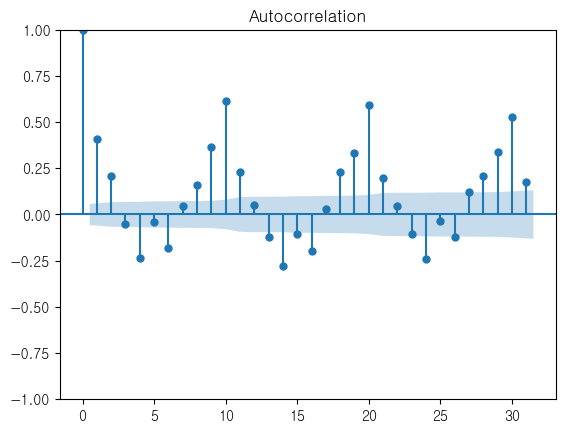

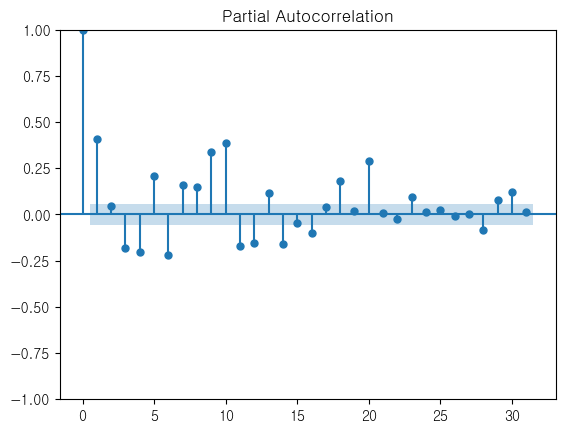

c:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

c:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

c:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



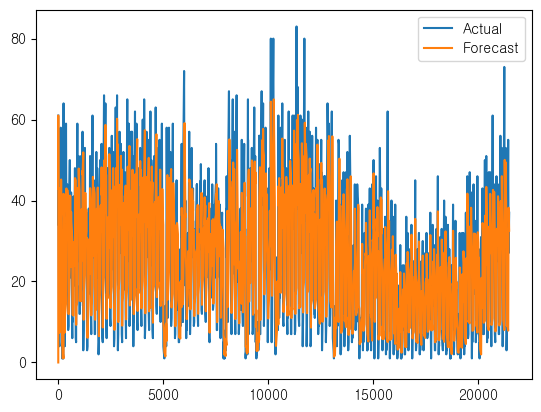

In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(a['전체_건수'])
plot_pacf(a['전체_건수'])
plt.show()

model = ARIMA(a['전체_건수'], order=(3, 1, 0))  # p, d, q는 선택한 파라미터입니다.
results = model.fit()

forecast = results.predict(start=0, end=len(a)-1, typ='levels')

plt.plot(a['전체_건수'], label='Actual')
plt.plot(forecast, label='Forecast')
plt.legend()
plt.show()

In [72]:
temp_10_work['대여소_ID'].values

array(['ST-2033', 'ST-2871', 'ST-2035', 'ST-3094', 'ST-1064', 'ST-1249',
       'ST-1063', 'ST-522', 'ST-2044', 'ST-1712'], dtype=object)

b == 'ST-2033', 'ST-2871' 두곳으로 특정 지어서 테스트

In [73]:
b = temp_df[temp_df['시작_대여소_ID'].isin(['ST-2033', 'ST-2871'])]

In [74]:
b

,기준_날짜,시작_대여소_ID,전체_건수,month
58,2023-04-03,ST-2033,4,4
117,2023-04-03,ST-2871,58,4
230,2023-04-05,ST-2871,2,4
311,2023-04-10,ST-2033,4,4
370,2023-04-10,ST-2871,59,4
...,...,...,...,...
21051,2024-03-21,ST-2871,56,3
21176,2024-03-25,ST-2033,10,3
21237,2024-03-25,ST-2871,73,3
21361,2024-03-27,ST-2033,7,3


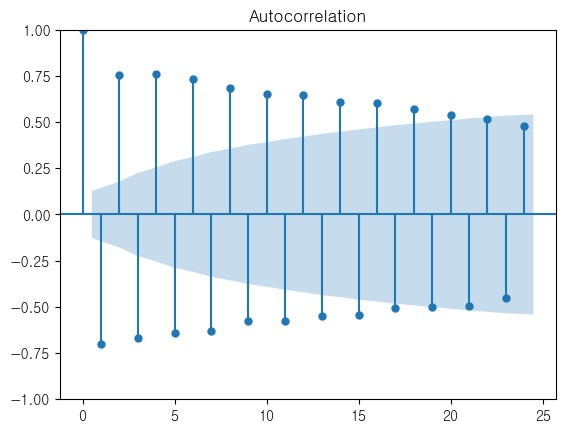

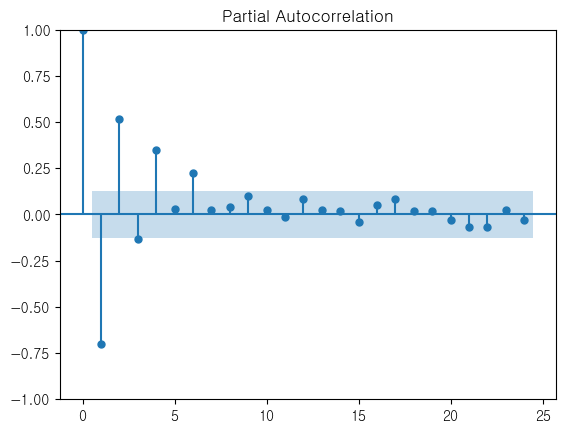

c:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

c:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

c:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



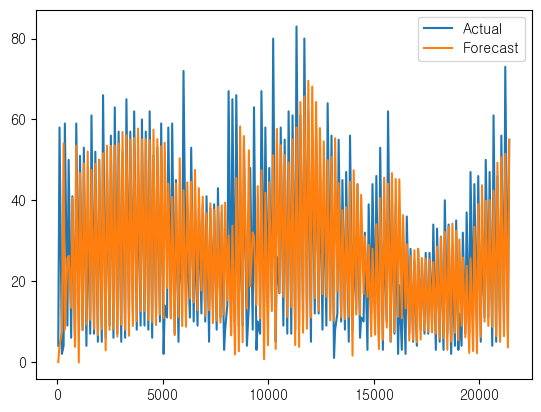

In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(b['전체_건수'])
plot_pacf(b['전체_건수'])
plt.show()

model = ARIMA(b['전체_건수'], order=(10, 1, 0))  # p, d, q는 선택한 파라미터입니다.
results = model.fit()

forecast = results.predict(start=0, end=len(b)-1, typ='levels')

plt.plot(b['전체_건수'], label='Actual')
plt.plot(forecast, label='Forecast')
plt.legend()
plt.show()